In [97]:
import numpy as np
import pandas as pd
%matplotlib inline

In [98]:
data = pd.read_csv("/Users/Hussein/Desktop/InstagramVideoDataScores.csv")
data.head()

,Unnamed: 0,talentId,platformId,type,followers,Avg View Through Rate,Avg Engagement Rate
0,13,0088a700-4144-4fd0-976c-bd9178414d6b,1.125563e+09,video,11399,1.20%,0.20%
1,15,02c592c7-106a-4d99-aca8-3b45724191e3,7.579333e+08,video,15147,3.58%,0.55%
2,17,042d2f1d-91c5-4115-ad02-e8a28e0cd383,2.242085e+08,video,13461,3.51%,1.05%
3,19,060c3a83-d443-4f60-aa65-9a939b9814be,3.086299e+08,video,7158,12.01%,3.19%
4,21,061a2922-8adb-4918-8789-56fdedf13993,1.491845e+09,video,14325,12.50%,1.84%


In [99]:
data = data.drop(axis=1, columns=['talentId', 'platformId', 'type', 'Unnamed: 0'])

In [100]:
data['Avg View Through Rate'] = [x.strip('%') for x in data['Avg View Through Rate']]
data['Avg Engagement Rate'] = [x.strip('%') for x in data['Avg Engagement Rate']]
data['Avg View Through Rate'] = pd.to_numeric(data['Avg View Through Rate'])
data['Avg Engagement Rate'] = pd.to_numeric(data['Avg Engagement Rate'])
data = data.loc[(data['followers'] <= 1000000)]
data = data.loc[(data['Avg View Through Rate'] <= 300)]

In [101]:
import matplotlib.pyplot as plt
print(data.shape)
data.head()

(2087, 3)


,followers,Avg View Through Rate,Avg Engagement Rate
0,11399,1.20,0.20
1,15147,3.58,0.55
2,13461,3.51,1.05
3,7158,12.01,3.19
4,14325,12.50,1.84


In [102]:
from sklearn.cluster import KMeans

[[8.55144488e+05 1.64813750e+01 1.53337500e+00]
 [1.60879768e+05 2.18467387e+01 2.07703340e+00]
 [3.31715529e+05 2.00878467e+01 2.00284672e+00]
 [5.24597327e+04 2.24088479e+01 2.44892166e+00]
 [5.85100511e+05 1.88333813e+01 2.07776978e+00]]


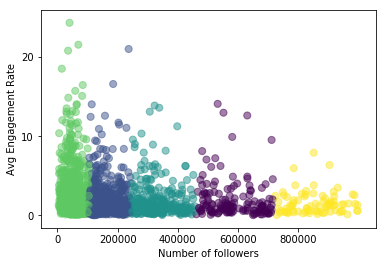

In [104]:
kmeans = KMeans(n_clusters=5).fit(data)
#centroids = kmeans.cluster_centers_
print(centroids)
plt.yticks(np.arange(0, 30, step=10))
plt.xticks(np.arange(0, 1000000, step=200000))
plt.xlabel("Number of followers")
plt.ylabel("Avg Engagement Rate")
plt.scatter(data.followers, data['Avg Engagement Rate'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

[[6.88428439e+04 2.21172939e+01 2.37125456e+00]
 [4.90590924e+05 1.95246784e+01 2.10280702e+00]
 [2.49027153e+05 2.21363615e+01 2.09446009e+00]
 [7.98966748e+05 1.49780672e+01 1.44319328e+00]]


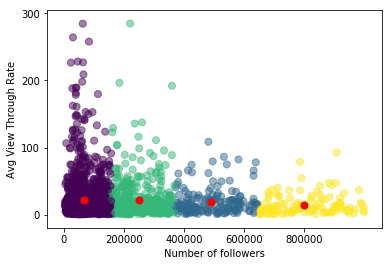

In [105]:
kmeans_2 = KMeans(n_clusters=4).fit(data)
centroids_2 = kmeans_2.cluster_centers_
print(centroids_2)
plt.yticks(np.arange(0, 350, step=100))
plt.xticks(np.arange(0, 1000000, step=200000))
plt.xlabel("Number of followers")
plt.ylabel("Avg View Through Rate")
plt.scatter(data.followers, data['Avg View Through Rate'], c=kmeans_2.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='red', s=50)